In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.metrics import precision_score, recall_score, f1_score

Training the Data

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Datasets/illegal_fishing_data.csv")
df.head()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon
0,121426486551523,1392604788,62239.937500,69998.281250,10.3,70.000000,50.052689,-1.631830
1,1252339803566,1456971800,42952.410156,52477.277344,5.4,93.000000,20.688517,-17.457317
2,121739171405202,1428161768,0.000000,2999.926270,0.0,99.000000,56.518200,20.990850
3,141431600530701,1438085847,0.000000,999.975464,0.0,320.899994,42.356224,14.414068
4,19859547683322,1438331947,11401.474609,49647.546875,3.1,129.100006,53.902554,8.275746


Training the Labels

In [ ]:
ddf = pd.read_csv(r"/content/drive/MyDrive/Datasets/illegal_fishing_class_labels.csv")
ddf.head()

,Unnamed: 0,target
0,d1,-1
1,d2,-1
2,d3,-1
3,d4,-1
4,d5,-1


In [ ]:
df['target'] = ddf['target']

# There are 8 dependant attributes and 838860 records

In [ ]:
df.head()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,target
0,121426486551523,1392604788,62239.937500,69998.281250,10.3,70.000000,50.052689,-1.631830,-1
1,1252339803566,1456971800,42952.410156,52477.277344,5.4,93.000000,20.688517,-17.457317,-1
2,121739171405202,1428161768,0.000000,2999.926270,0.0,99.000000,56.518200,20.990850,-1
3,141431600530701,1438085847,0.000000,999.975464,0.0,320.899994,42.356224,14.414068,-1
4,19859547683322,1438331947,11401.474609,49647.546875,3.1,129.100006,53.902554,8.275746,-1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838860 entries, 0 to 838859
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   mmsi                 838860 non-null  int64  
 1   timestamp            838860 non-null  int64  
 2   distance_from_shore  838860 non-null  float64
 3   distance_from_port   838860 non-null  float64
 4   speed                838857 non-null  float64
 5   course               838857 non-null  float64
 6   lat                  838860 non-null  float64
 7   lon                  838860 non-null  float64
 8   target               838860 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 57.6 MB


In [ ]:
print(df.shape)
print(ddf.shape)

(838860, 9)
(838860, 2)


There are 8 dependant attributes and 838860 records

Describing the Data

In [ ]:
df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,target
count,8.388600e+05,8.388600e+05,8.388600e+05,8.388600e+05,838857.000000,838857.000000,838860.000000,838860.000000,838860.000000
mean,6.473898e+13,1.424273e+09,2.978600e+04,4.754523e+04,2.297752,183.344641,52.284092,5.946398,-0.950138
std,4.463747e+13,3.866942e+07,6.801536e+04,8.329854e+04,3.747304,114.404061,7.487147,11.325362,0.247370
min,1.252340e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-83.484398,-167.559769,-1.000000
25%,1.985955e+13,1.394920e+09,0.000000e+00,9.999755e+02,0.000000,75.699997,52.099167,-2.001655,-1.000000
50%,6.960986e+13,1.432542e+09,0.000000e+00,1.004963e+04,0.000000,200.000000,53.779861,4.585558,-1.000000
75%,1.124532e+14,1.456679e+09,4.002401e+04,6.985528e+04,3.100000,283.399994,57.393181,18.418943,-1.000000
max,1.414316e+14,1.480032e+09,2.252376e+06,1.181676e+07,102.300003,405.100006,77.244652,177.426651,1.000000


In [ ]:
ddf.target.value_counts()

-1    802828
 0     30237
 1      5795
Name: target, dtype: int64

We can see that this is a three class classification problem as there are 3 classes, -1, 0 and 1

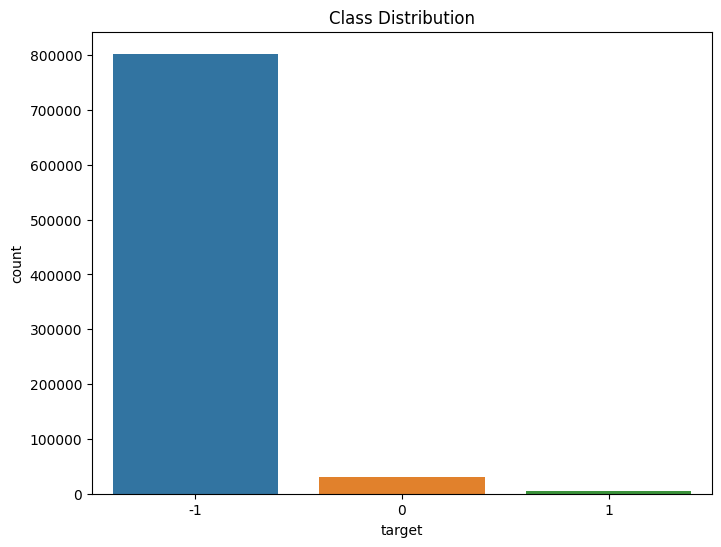

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="target", data=ddf)
plt.title("Class Distribution")
plt.show()

Also we observe an imbalance in the classification

Checking for Null Values

In [ ]:
df.isnull().sum()

mmsi                   0
timestamp              0
distance_from_shore    0
distance_from_port     0
speed                  3
course                 3
lat                    0
lon                    0
target                 0
dtype: int64

Immuting the respective null values with the most suitable values.

In [ ]:
mean_speed = df.speed.mean()
df.speed.fillna(mean_speed,inplace = True)
median_course = df.course.median()
df.course.fillna(median_course,inplace = True)

In [ ]:
df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,target
count,8.388600e+05,8.388600e+05,8.388600e+05,8.388600e+05,838860.000000,838860.000000,838860.000000,838860.000000,838860.000000
mean,6.473898e+13,1.424273e+09,2.978600e+04,4.754523e+04,2.297752,183.344700,52.284092,5.946398,-0.950138
std,4.463747e+13,3.866942e+07,6.801536e+04,8.329854e+04,3.747297,114.403860,7.487147,11.325362,0.247370
min,1.252340e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-83.484398,-167.559769,-1.000000
25%,1.985955e+13,1.394920e+09,0.000000e+00,9.999755e+02,0.000000,75.699997,52.099167,-2.001655,-1.000000
50%,6.960986e+13,1.432542e+09,0.000000e+00,1.004963e+04,0.000000,200.000000,53.779861,4.585558,-1.000000
75%,1.124532e+14,1.456679e+09,4.002401e+04,6.985528e+04,3.100000,283.399994,57.393181,18.418943,-1.000000
max,1.414316e+14,1.480032e+09,2.252376e+06,1.181676e+07,102.300003,405.100006,77.244652,177.426651,1.000000


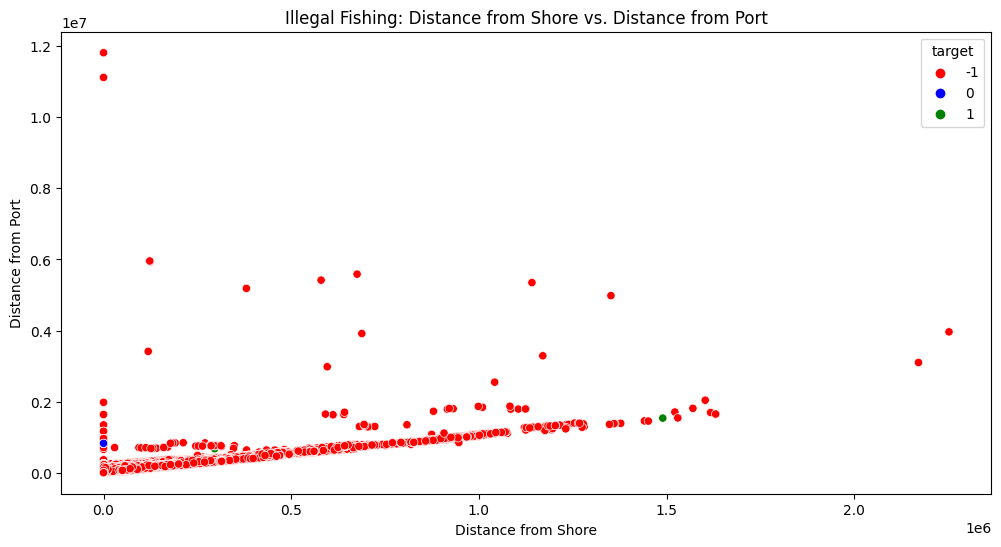

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="distance_from_shore", y="distance_from_port",hue = "target", data=df,palette={-1:"red",0:"blue",1:"green"})
plt.xlabel("Distance from Shore")
plt.ylabel("Distance from Port")
plt.title("Illegal Fishing: Distance from Shore vs. Distance from Port")
plt.show()

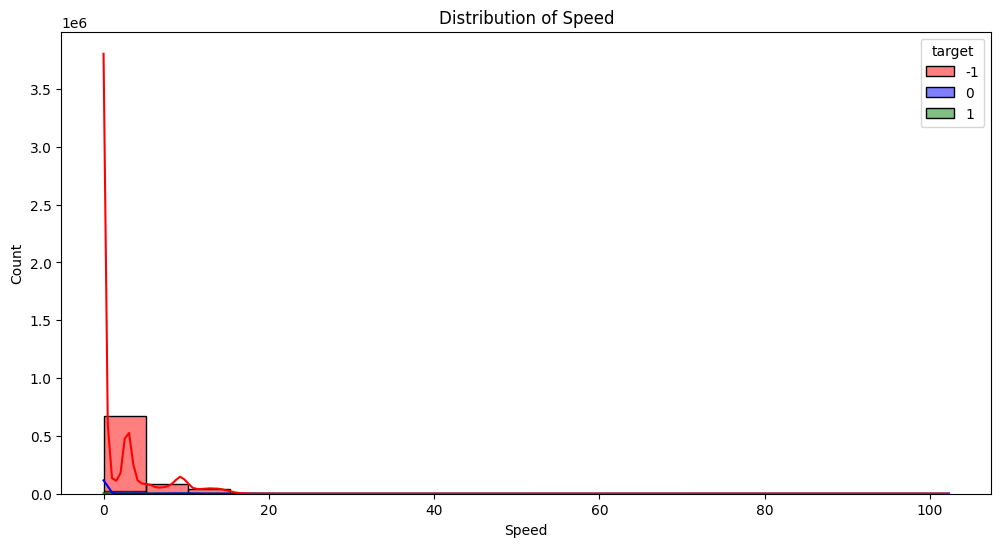

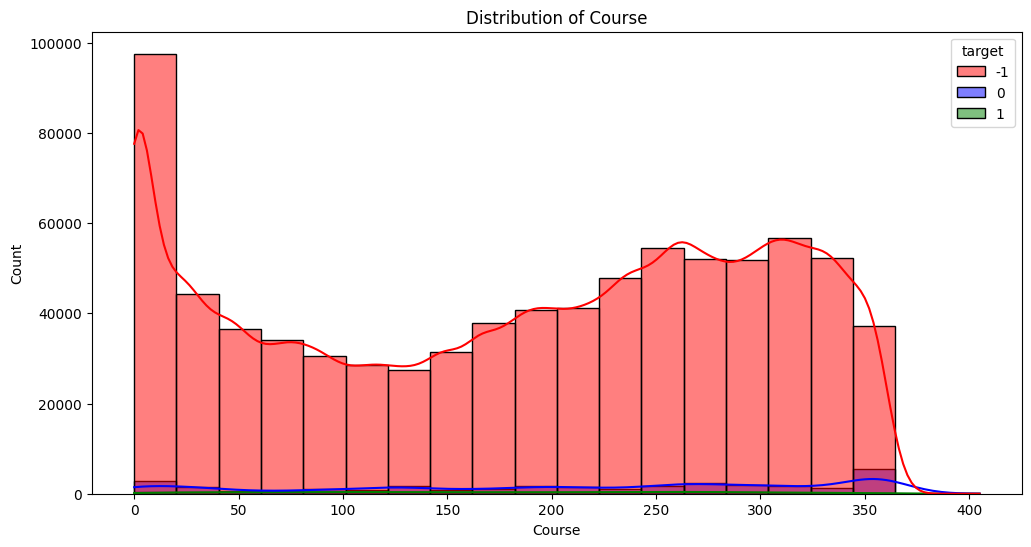

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data = df,x="speed", hue = "target",bins=20, kde=True,palette={-1:"red",0:"blue",1:"green"})
plt.xlabel("Speed")
plt.title("Distribution of Speed")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df,x="course", bins=20,hue = "target", kde=True,palette={-1:"red",0:"blue",1:"green"})
plt.xlabel("Course")
plt.title("Distribution of Course")
plt.show()

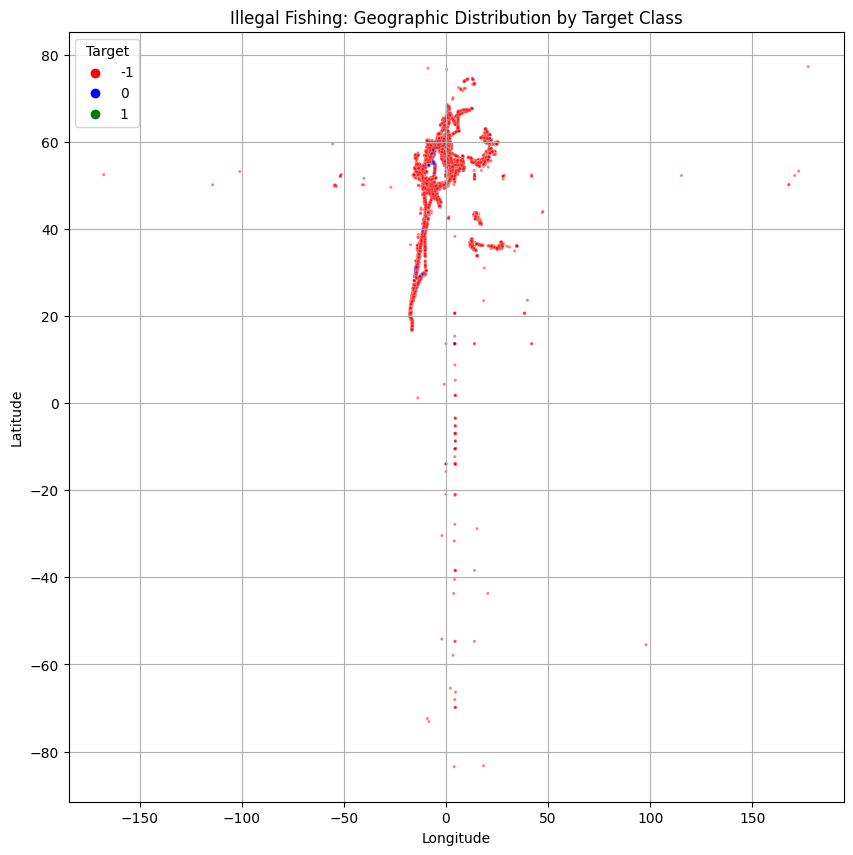

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="lon", y="lat", hue="target", data=df, s=5, alpha=0.5,palette={-1:"red",0:"blue",1:"green"})
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Illegal Fishing: Geographic Distribution by Target Class")
plt.grid(True)
plt.legend(title="Target")
plt.show()

Directly running the model.

In [ ]:
X = df.drop(columns=['target'])
y = df.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of classifiers to test
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Machine", SVC())
]

overall_results = []

# Iterate through classifiers and print classification reports
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"Classifier: {clf_name}")
    classification_rep = classification_report(y_test, y_pred, zero_division='warn')
    print(classification_rep)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate precision, recall, and F1 score for the entire model
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    overall_results.append((clf_name, precision, recall, f1))

    print("=" * 60)

# Print overall results
print("Overall Results:")
for clf_name, precision, recall, f1 in overall_results:
    print(f"Classifier: {clf_name}")
    print(f"Weighted Precision: {precision:.2f}")
    print(f"Weighted Recall: {recall:.2f}")
    print(f"Weighted F1 Score: {f1:.2f}")
    print("-" * 60)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.96      1.00      0.98    160489
           0       0.00      0.00      0.00      6128
           1       0.00      0.00      0.00      1155

    accuracy                           0.96    167772
   macro avg       0.32      0.33      0.33    167772
weighted avg       0.92      0.96      0.94    167772

Confusion Matrix:
[[160489      0      0]
 [  6128      0      0]
 [  1155      0      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: Decision Tree
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    160489
           0       0.97      0.97      0.97      6128
           1       0.85      0.85      0.85      1155

    accuracy                           1.00    167772
   macro avg       0.94      0.94      0.94    167772
weighted avg       1.00      1.00      1.00    167772

Confusion Matrix:
[[160246    126    117]
 [   123   5951     54]
 [   132     47    976]]
Classifier: Random Forest
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    160489
           0       0.97      0.97      0.97      6128
           1       0.88      0.84      0.86      1155

    accuracy                           1.00    167772
   macro avg       0.95      0.93      0.94    167772
weighted avg       1.00      1.00      1.00    167772

Confusion Matrix:
[[160284    118     87]
 [   153   5924     51]
 [   142     44    969]]
Clas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[160489      0      0]
 [  6128      0      0]
 [  1155      0      0]]
Overall Results:
Classifier: Logistic Regression
Weighted Precision: 0.32
Weighted Recall: 0.33
Weighted F1 Score: 0.33
------------------------------------------------------------
Classifier: Decision Tree
Weighted Precision: 0.94
Weighted Recall: 0.94
Weighted F1 Score: 0.94
------------------------------------------------------------
Classifier: Random Forest
Weighted Precision: 0.95
Weighted Recall: 0.93
Weighted F1 Score: 0.94
------------------------------------------------------------
Classifier: Gradient Boosting
Weighted Precision: 0.90
Weighted Recall: 0.80
Weighted F1 Score: 0.85
------------------------------------------------------------
Classifier: K-Nearest Neighbors
Weighted Precision: 0.96
Weighted Recall: 0.95
Weighted F1 Score: 0.96
------------------------------------------------------------
Classifier: Support Vector Machine
Weighted Precision: 0.32
Weighted Recall: 0.33
Weighted F1 Score: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature selection using information gain

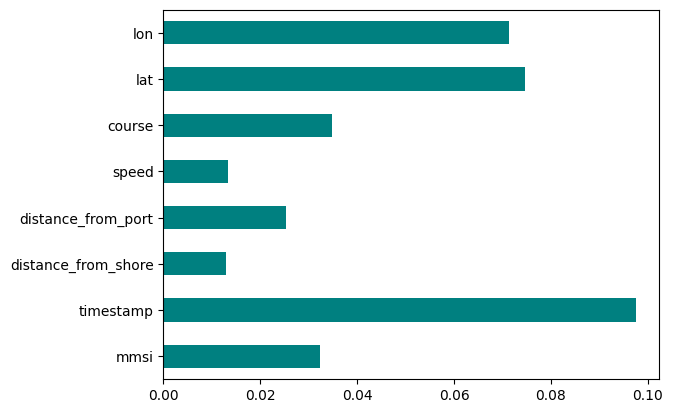

In [ ]:
X = df.drop(columns=['target'])
y = df.target

from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,X.columns)
feat_importances.plot(kind = "barh",color = 'teal')
plt.show()

We can see that the 'lon', 'lat', 'timestamp' affect the target most

Using smote enn to tackle class imbalance and using feature selection

In [ ]:
X = df.drop(columns= ['speed','distance_from_port','distance_from_shore','mmsi','course','target'])
y = df.target
smote = SMOTEENN(random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a list of classifiers to test
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
    # ("Support Vector Machine", SVC())
]

overall_results = []

# Iterate through classifiers and print classification reports
for clf_name, clf in classifiers:
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)

    print(f"Classifier: {clf_name}")
    print(classification_report(y_test, y_pred,zero_division='warn'))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate precision, recall, and F1 score for the entire model
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    overall_results.append((clf_name, precision, recall, f1))
    print("=" * 60)

# Print overall results
print("Overall Results:")
for clf_name, precision, recall, f1 in overall_results:
    print(f"Classifier: {clf_name}")
    print(f"Weighted Precision: {precision:.2f}")
    print(f"Weighted Recall: {recall:.2f}")
    print(f"Weighted F1 Score: {f1:.2f}")
    print("-" * 60)

# We see variations in the quality of the models

Classifier: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.96      1.00      0.98    160489
           0       0.00      0.00      0.00      6128
           1       0.00      0.00      0.00      1155

    accuracy                           0.96    167772
   macro avg       0.32      0.33      0.33    167772
weighted avg       0.92      0.96      0.94    167772

Confusion Matrix:
[[160489      0      0]
 [  6128      0      0]
 [  1155      0      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: Decision Tree
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99    160489
           0       0.73      0.98      0.84      6128
           1       0.55      0.94      0.70      1155

    accuracy                           0.98    167772
   macro avg       0.76      0.97      0.84    167772
weighted avg       0.99      0.98      0.98    167772

Confusion Matrix:
[[157575   2114    800]
 [    52   5993     83]
 [    13     53   1089]]
Classifier: Random Forest
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99    160489
           0       0.81      0.98      0.89      6128
           1       0.57      0.96      0.71      1155

    accuracy                           0.99    167772
   macro avg       0.79      0.98      0.86    167772
weighted avg       0.99      0.99      0.99    167772

Confusion Matrix:
[[158375   1376    738]
 [    27   5986    115]
 [    10     34   1111]]
Clas

Reason for commenting out Support Vector Machine: The code ran for around 3.5hrs and crashed as a result of memory filling up.

Define a range of maximum depths to test

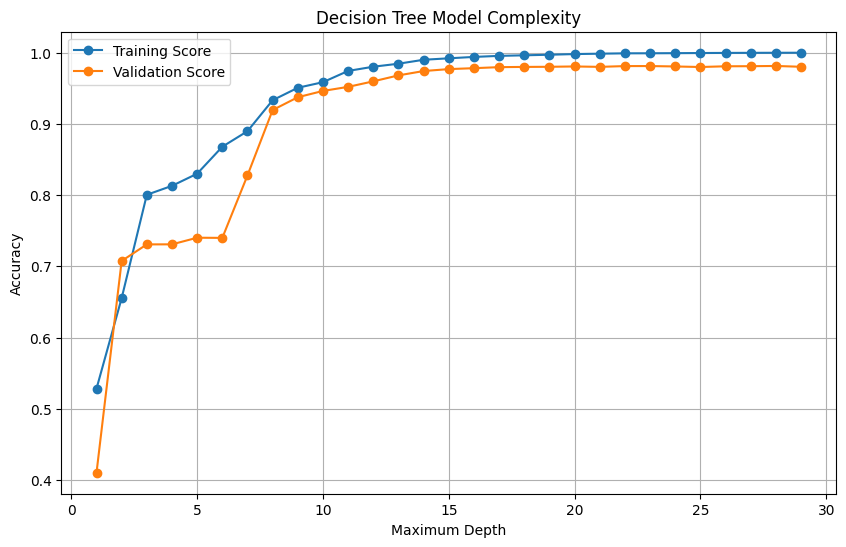

In [ ]:
max_depths = range(1, 30)
train_scores = []
val_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_resampled, y_resampled)

    # Evaluate on the training set
    train_score = clf.score(X_resampled, y_resampled)
    train_scores.append(train_score)

    # Evaluate on the validation set
    val_score = clf.score(X_test, y_test)
    val_scores.append(val_score)

# Plot the training and validation scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Score', marker='o')
plt.plot(max_depths, val_scores, label='Validation Score', marker='o')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Complexity')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
clf = DecisionTreeClassifier(max_depth=17)
clf.fit(X_resampled,y_resampled)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99    160489
           0       0.73      0.96      0.83      6128
           1       0.50      0.96      0.66      1155

    accuracy                           0.98    167772
   macro avg       0.74      0.97      0.83    167772
weighted avg       0.99      0.98      0.98    167772



Performing GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [10, 13, 15, 16],
    'min_samples_split': [2, 5, 7,9],
    'min_samples_leaf': [1, 2, 4,6]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=16)

In [ ]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99    160489
           0       0.73      0.96      0.83      6128
           1       0.44      0.97      0.61      1155

    accuracy                           0.98    167772
   macro avg       0.73      0.97      0.81    167772
weighted avg       0.99      0.98      0.98    167772



In [ ]:
# Make predictions on the training data
y_train_pred = final_model.predict(X_resampled)

# Make predictions on the testing data
y_test_pred = final_model.predict(X_test)

# Print classification reports for both training and testing data
print("Classification Report for Training Data:")
print(classification_report(y_resampled, y_train_pred))

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    562415
           0       1.00      0.98      0.99    446913
           1       0.99      1.00      0.99    555193

    accuracy                           0.99   1564521
   macro avg       0.99      0.99      0.99   1564521
weighted avg       0.99      0.99      0.99   1564521

Classification Report for Testing Data:
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99    160489
           0       0.73      0.96      0.83      6128
           1       0.44      0.97      0.61      1155

    accuracy                           0.98    167772
   macro avg       0.73      0.97      0.81    167772
weighted avg       0.99      0.98      0.98    167772



In [ ]:
# Confusion Matrix for the decision tree model
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

[[157219   2111   1159]
 [    29   5860    239]
 [     9     27   1119]]


Visualizing the Decision Tree

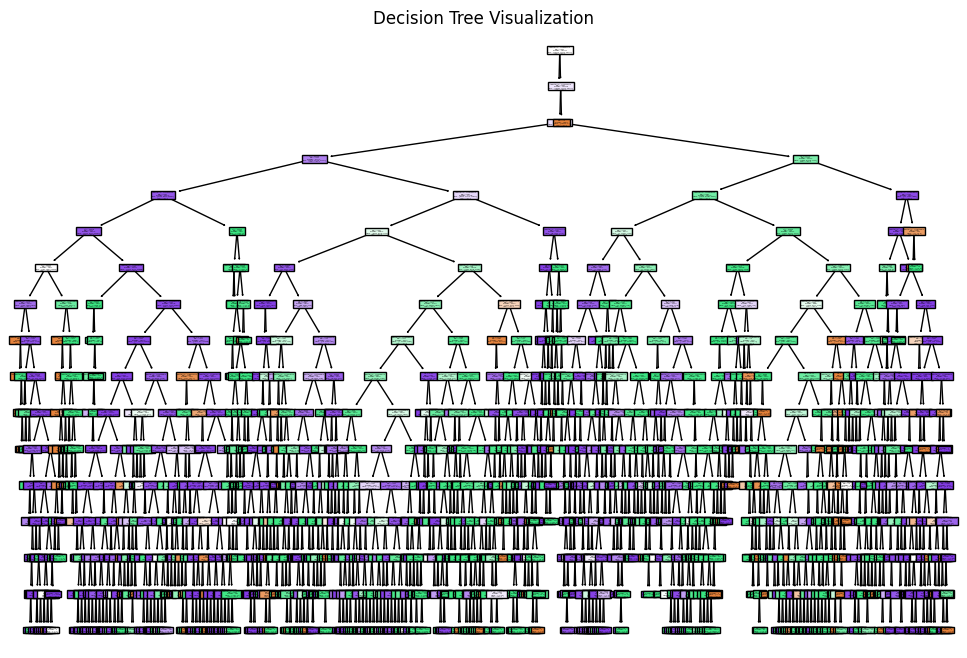

In [ ]:
from sklearn.tree import plot_tree


plt.figure(figsize=(12, 8))
plot_tree(final_model, filled=True, feature_names=X_resampled.columns, class_names=["Class -1", "Class 0", "Class 1"])
plt.title("Decision Tree Visualization")
plt.show()

Performing RandomizedSearchCV

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf = RandomForestClassifier()

# Define a hyperparameter grid
param_grid = {
    'n_estimators': [80],
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [int(x) for x in np.linspace(20,24)],  # maximum depth range
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=1, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform the random search
random_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy Score: ", random_search.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters:  {'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Accuracy Score:  0.9954005092119914


In [ ]:
best_rf = RandomForestClassifier(
    n_estimators=random_search.best_params_['n_estimators'],
    max_features=random_search.best_params_['max_features'],
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    min_samples_leaf=random_search.best_params_['min_samples_leaf'],
    bootstrap=random_search.best_params_['bootstrap']
)

# Fit the data to the best Random Forest model
best_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=80)

In [ ]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99    160489
           0       0.80      0.97      0.87      6128
           1       0.51      0.97      0.67      1155

    accuracy                           0.98    167772
   macro avg       0.77      0.97      0.84    167772
weighted avg       0.99      0.98      0.99    167772



In [ ]:
# Make predictions on the training data
y_train_pred = best_rf.predict(X_resampled)

# Make predictions on the testing data
y_test_pred = best_rf.predict(X_test)

# Print classification reports for both training and testing data
print("Classification Report for Training Data:")
print(classification_report(y_resampled, y_train_pred))

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    562415
           0       1.00      0.99      0.99    446913
           1       0.99      1.00      1.00    555193

    accuracy                           1.00   1564521
   macro avg       1.00      1.00      1.00   1564521
weighted avg       1.00      1.00      1.00   1564521

Classification Report for Testing Data:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99    160489
           0       0.80      0.97      0.87      6128
           1       0.51      0.97      0.67      1155

    accuracy                           0.98    167772
   macro avg       0.77      0.97      0.84    167772
weighted avg       0.99      0.98      0.99    167772



In [ ]:
# Confusion Matrix for the best random forest model
print(confusion_matrix(y_test, y_pred))

[[158114   1486    889]
 [    19   5914    195]
 [     8     31   1116]]
